In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Data Preprocessing

### Load the data

In [3]:
# Load training data
raw_train_data = pd.read_csv('../data/train.csv')
train_data = raw_train_data.to_numpy(dtype=np.float32)[:, 1:].T
train_labels = raw_train_data['label']

# Load testing data
raw_test_data = pd.read_csv('../data/test.csv')
test_data = raw_test_data.to_numpy(dtype=np.float32)[:, 1:].T
test_labels = raw_test_data['label']

# Normalize pixel data to prevent overflow
train_data /= 255.0
test_data /= 255.0

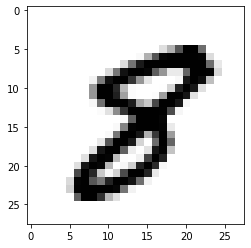

In [4]:
img = train_data[:,0].reshape(28,28)
plt.imshow(img, cmap="Greys")

### Apply HOG decomposition

In [55]:
from hog import hog_horizontal_gradient, hog_vertical_gradient, hog_gradient_magnitudes, hog_gradient_directions, hog_histogram, hog

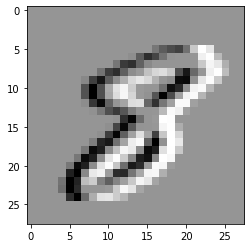

In [6]:
hog_horz_img = hog_horizontal_gradient(img)
plt.imshow(hog_horz_img, cmap="Greys")

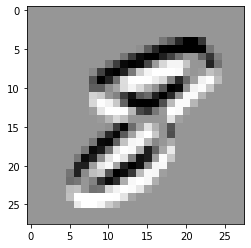

In [7]:
hog_vert_img = hog_vertical_gradient(img)
plt.imshow(hog_vert_img, cmap="Greys")

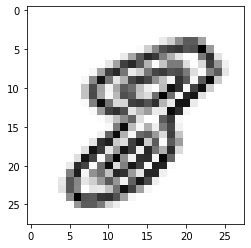

In [8]:
hog_mag_img = hog_gradient_magnitudes(hog_horz_img, hog_vert_img)
plt.imshow(hog_mag_img, cmap="Greys")

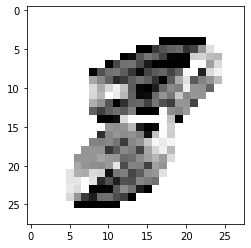

In [33]:
hog_dir_img = hog_gradient_directions(hog_horz_img, hog_vert_img)
plt.imshow(hog_dir_img, cmap="Greys")

[20.66418657 27.30088844 85.65195013 41.61860843 24.58090162  0.
  0.          0.          0.        ]


<BarContainer object of 9 artists>

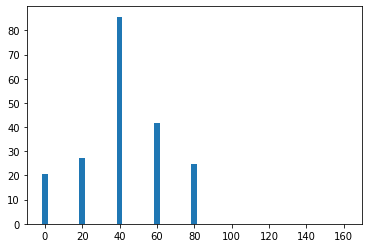

In [56]:
hist = hog_histogram(hog_mag_img, hog_dir_img, 9)
print(hist)
plt.bar(height=hist, x=[0, 20, 40, 60, 80, 100, 120, 140, 160], width=3)

(576, 9)


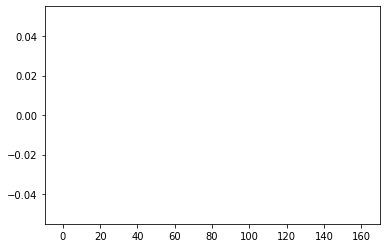

In [64]:
hists = hog(hog_mag_img, hog_dir_img)
print(hists.shape)

plt.bar(height=hists[0,:], x=[0, 20, 40, 60, 80, 100, 120, 140, 160], width=3)


## Train the Model

In [21]:
from mlp import mlp_train, mlp_predict, sigmoid, nll

In [ ]:
# Train MLP
mlp_params = {
    'max_iter': 1000,
    'activation_function': sigmoid,
    'loss_function': nll,
    'lambda': 0.1,
    'num_hidden_units': [200, 15],
    'learning_rate': 0.001
}

mlp_model = mlp_train(train_data, train_labels, mlp_params)

In [29]:
# Test MLP
mlp_pred_labels, mlp_scores, _, _ = mlp_predict(test_data, mlp_model)
mlp_accuracy = np.mean(mlp_pred_labels == test_labels)

print(f'MLP Model accuracy: {mlp_accuracy}')

MLP Model accuracy: 0.97475
